In [18]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.figure
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

## Load Data

In [ ]:
titanic = pd.read_csv("C:/Users/AULA04/Desktop/Codes/Curso/Data/titanic.csv")
titanic_org = titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploration Data

In [6]:
#Cuantas personas murieron dependiendo de la clase a la que pertenecen?
titanic.groupby(["Pclass", "Survived"]).size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


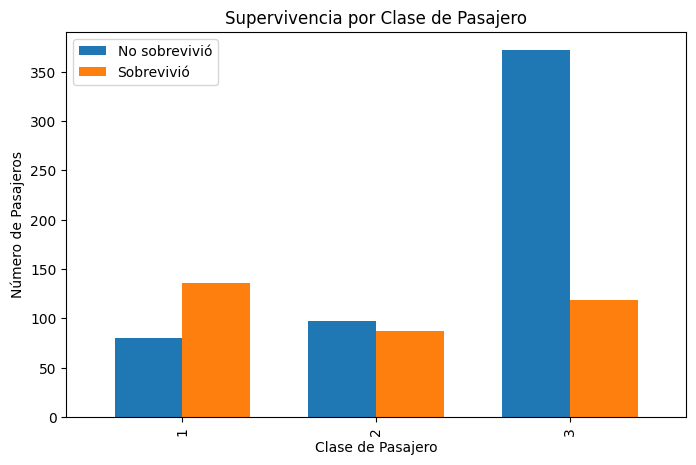

In [7]:
# Contar cuántas personas sobrevivieron y cuántas no por clase
survival_counts = titanic.groupby(["Pclass", "Survived"]).size().unstack()

# Crear gráfico de barras agrupadas
survival_counts.plot(kind="bar", figsize=(8,5), width=0.7)

# Configurar etiquetas y título
plt.xlabel("Clase de Pasajero")
plt.ylabel("Número de Pasajeros")
plt.title("Supervivencia por Clase de Pasajero")
plt.legend(["No sobrevivió", "Sobrevivió"], loc="best")

plt.show()


891

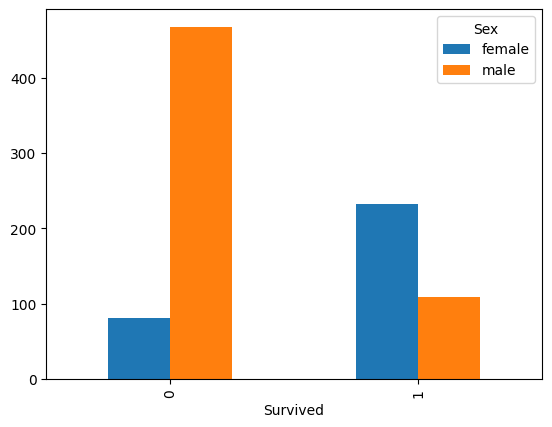

In [ ]:
titanic_org.groupby(["Survived","Sex"]).size().unstack().plot(kind="bar")

titanic_org.groupby(["Survived","Sex"]).size().sum()

## PreProcessing Data

Deleted:
* PassengerId
* Name
* Ticket

* Cabin: Possible use

In [9]:
titanic = titanic.drop("PassengerId",axis=1)
titanic = titanic.drop("Name",axis=1)
titanic = titanic.drop("Ticket",axis=1)
titanic = titanic.drop("Cabin",axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Gender

In [10]:
titanic = pd.concat([titanic,pd.get_dummies(titanic.Sex)*1],axis=1)
titanic = titanic.drop("Sex",axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,NaN,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


Embarked

In [11]:
label_encoder = preprocessing.LabelEncoder() 
titanic['Embarked']= label_encoder.fit_transform(titanic['Embarked'])
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,2,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,2,1,0
3,1,1,35.0,1,0,53.1000,2,1,0
4,0,3,35.0,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,0,1
887,1,1,19.0,0,0,30.0000,2,1,0
888,0,3,NaN,1,2,23.4500,2,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


Age

In [12]:
titanic.Age = titanic.Age.fillna(titanic["Age"].mean())

Preparete for train

In [13]:
scaler = MinMaxScaler()
titanic_normalized = scaler.fit_transform(titanic)
titanic_normalized = pd.DataFrame(titanic_normalized, columns=titanic.columns)
titanic_normalized

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.666667,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.000000,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.666667,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.666667,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.666667,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.666667,1.0,0.0
888,0.0,1.0,0.367921,0.125,0.333333,0.045771,0.666667,1.0,0.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.000000,0.0,1.0


In [14]:
titanic_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
 7   female    891 non-null    float64
 8   male      891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


### Division dataset

In [15]:
y = titanic_normalized["Survived"]
x = titanic_normalized.drop(columns=["Survived"])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

print(f"Train: {len(X_train)} ")
print(f"Valid: {len(X_valid)} ")
print(f"Test: {len(X_test)} ") 

Train: 640 
Valid: 161 
Test: 90 


Function to comparate

In [ ]:
def plot_metrics(
        model_name: str,
        y_pred: pd.Series,
        y_test: pd.Series,
        figure: tuple[matplotlib.figure.Figure, np.array] = None
):
    precision_, recall_, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall_, precision_)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    if figure is None:
        fig, ax = plt.subplots(1,2, figsize=(14,7))
    else:
        fig, ax = figure
    
    ax[0].plot(recall_, precision_, label=f"{model_name}: AUC:{pr_auc:.2f}")
    ax[0].set_xlabel("recall")
    ax[0].set_ylabel("precision")
    ax[0].set_title(F"precision-recall Curve")
    ax[0].legend()

    ax[1].plot(fpr,tpr,label=f"AUC: {roc_auc:.2f}")
    ax[1].set_xlabel("FPR")
    ax[1].set_ylabel("TPR")
    ax[1].set_title(f"ROC Curve")
    ax[1].legend()

### Baseline

In [63]:
Rate_sex_survived = pd.DataFrame(titanic_org.groupby(["Sex"])["Survived"].sum() / titanic_org["Survived"].sum())
Rate_sex_survived*100

,Survived
Sex,
female,68.128655
male,31.871345


In [80]:
female = float(Rate_sex_survived.loc["female"])
female

C:\Users\AULA04\AppData\Local\Temp\ipykernel_10732\1249799538.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  female = float(Rate_sex_survived.loc["female"])


0.6812865497076024

In [64]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
592,1.0,0.585323,0.000,0.000000,0.014151,0.666667,0.0,1.0
821,1.0,0.334004,0.000,0.000000,0.016908,0.666667,0.0,1.0
493,0.0,0.886906,0.000,0.000000,0.096626,0.000000,0.0,1.0
43,0.5,0.032420,0.125,0.333333,0.081157,0.000000,1.0,0.0
583,0.0,0.447097,0.000,0.000000,0.078319,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...
644,1.0,0.004147,0.250,0.166667,0.037590,0.000000,1.0,0.0
357,0.5,0.472229,0.000,0.000000,0.025374,0.666667,1.0,0.0
56,0.5,0.258608,0.000,0.000000,0.020495,0.666667,1.0,0.0
655,0.5,0.296306,0.250,0.000000,0.143462,0.666667,0.0,1.0


In [ ]:
#for person in titanic_normalized:
female = float(Rate_sex_survived.loc["female"])
male = float(Rate_sex_survived.loc["male"])

y_pred = X_train["female"] * female
y_pred = X_train["male"] * male
y_pred

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


cross_val_score(gnb, x, y, cv=10).mean()
cross_val_score(gnb, x, y, cv=10, scoring='precision').mean()
cross_val_score(gnb, x, y, cv=10, scoring='recall').mean()

### Regresion logistica

In [21]:
model = LogisticRegression( 
    random_state=42, 
    max_iter=500
    )

model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
y_test_pred = model.predict(X_test)
print("Evaluación en Validación:\n", classification_report(y_test, y_test_pred))

Evaluación en Validación:
               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        55
         1.0       0.71      0.69      0.70        35

    accuracy                           0.77        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.77      0.77      0.77        90



In [24]:
#error log-loss logaritmic loss o binary cross entropy

y_train_probs = model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1
train_loss = log_loss(y_train, y_train_probs)
print("Log Loss en entrenamiento:", train_loss)

Log Loss en entrenamiento: 0.4429338503579466


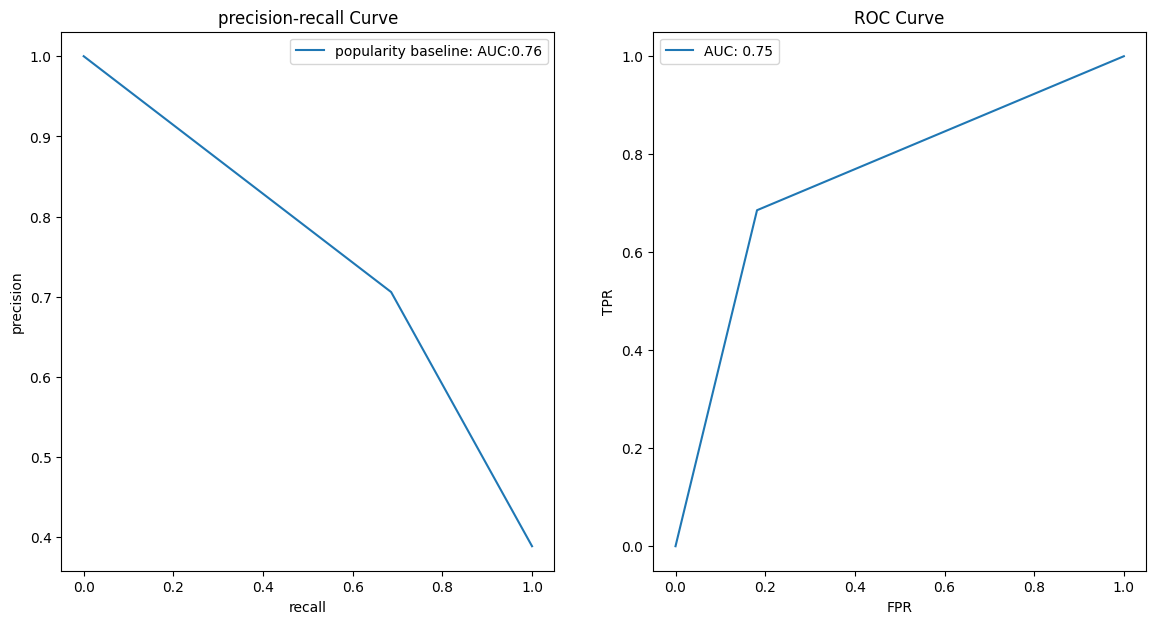

In [23]:
plot_metrics("popularity baseline", y_pred=y_test_pred, y_test=y_test)

Curva ROC

### Kmeans

In [25]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1)

In [ ]:
# Realizamos la prediccion sobre los datos de test

y_prediccion_knn = knn.predict(X_test)
print("Evaluación en Validación:\n", classification_report(y_test, y_prediccion_knn))

Evaluación en Validación:
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        55
         1.0       0.81      0.60      0.69        35

    accuracy                           0.79        90
   macro avg       0.79      0.75      0.76        90
weighted avg       0.79      0.79      0.78        90



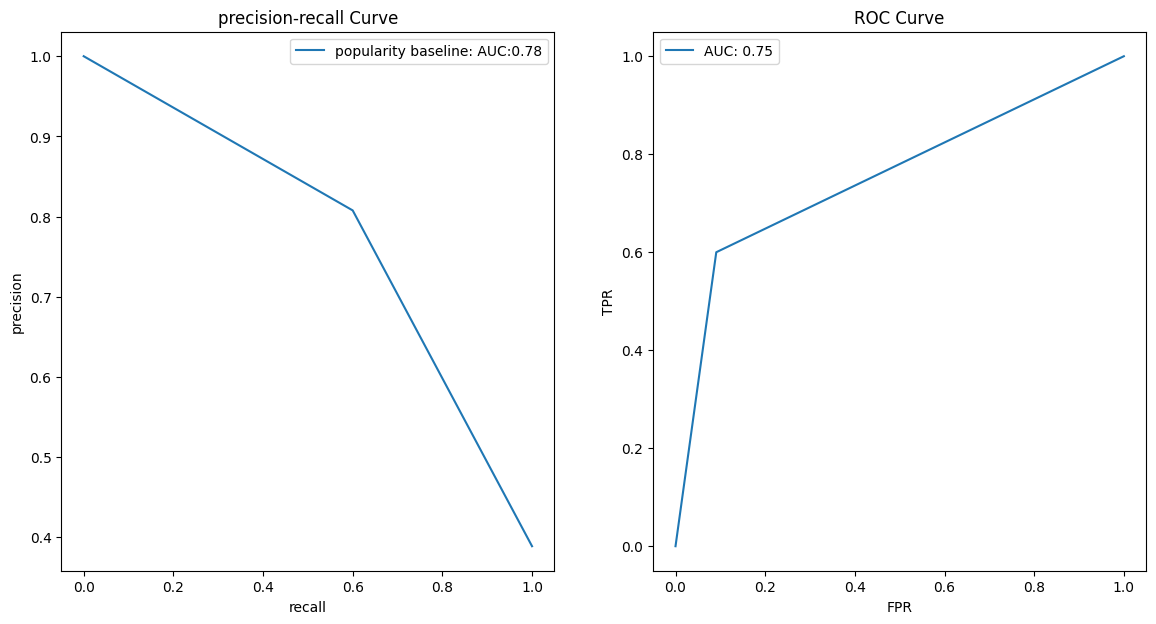

In [29]:
plot_metrics("popularity baseline", y_pred=y_prediccion_knn, y_test=y_test)